# Predicting the Cooling Load of Buildings

The study is focused on using machine learning to assess the cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

## Data Gathering 

The dataset was obtained from the UCI Machine learning repository
https://archive.ics.uci.edu/ml/datasets/energy+efficiency


The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by Y1 and Y2). The aim is to use the eight features to predict the response Cooling Load(Y2).
Specifically:

|Variable||Attributes|
|-----||----|
|X1||Relative Compactness|
|X2||Surface Area|
|X3||Wall Area|
|X4||Roof Area|
|X5||Overall Height|
|X6||Orientation|
|X7||Glazing Area|
|X8||Glazing Area Distribution|
|y1||Heating Load|
|y2||Cooling Load|

In [1]:
## Importing drive  from google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## install xgboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Loading Dataset

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Importing the needed Regressors for building models,validation, and metrics.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [5]:
# Load dataset

df = pd.read_excel("/content/drive/MyDrive/Regression Model for Group 2/ENB2012_data.xlsx")

In [6]:
# Output the first 5 rows

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
# Output the last 5 rows

df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [8]:
# Drop the Y1 column
df.drop('Y1', axis = 1, inplace = True)

In [9]:
#Check for number of columns and rows
df.shape

(768, 9)

In [10]:
## Display columns
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y2'], dtype='object')

## Exploratory data analysis and data cleaning

In [11]:
# Renaming columns
df.columns = ["Relative Compactness","Surface Area","Wall Area",
                "Roof Area", "Overall Height","Orientation","Glazing Area",
                "Glazing Area Distribution", "Cooling Load"]

In [12]:
# Check data types and missing values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Cooling Load               768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB




An examination of the data shows that there are no missing values and all data types are numerical. There are a total of 9 columns and 768 rows.
An in-depth exploration follows. 


In [13]:
#Check summmary statistics of all columns
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.76,0.11,0.62,0.68,0.75,0.83,0.98
Surface Area,768.0,671.71,88.09,514.50,606.38,673.75,741.12,808.50
Wall Area,768.0,318.50,43.63,245.00,294.00,318.50,343.00,416.50
Roof Area,768.0,176.60,45.17,110.25,140.88,183.75,220.50,220.50
Overall Height,768.0,5.25,1.75,3.50,3.50,5.25,7.00,7.00
Orientation,768.0,3.50,1.12,2.00,2.75,3.50,4.25,5.00
Glazing Area,768.0,0.23,0.13,0.00,0.10,0.25,0.40,0.40
Glazing Area Distribution,768.0,2.81,1.55,0.00,1.75,3.00,4.00,5.00
Cooling Load,768.0,24.59,9.51,10.90,15.62,22.08,33.13,48.03


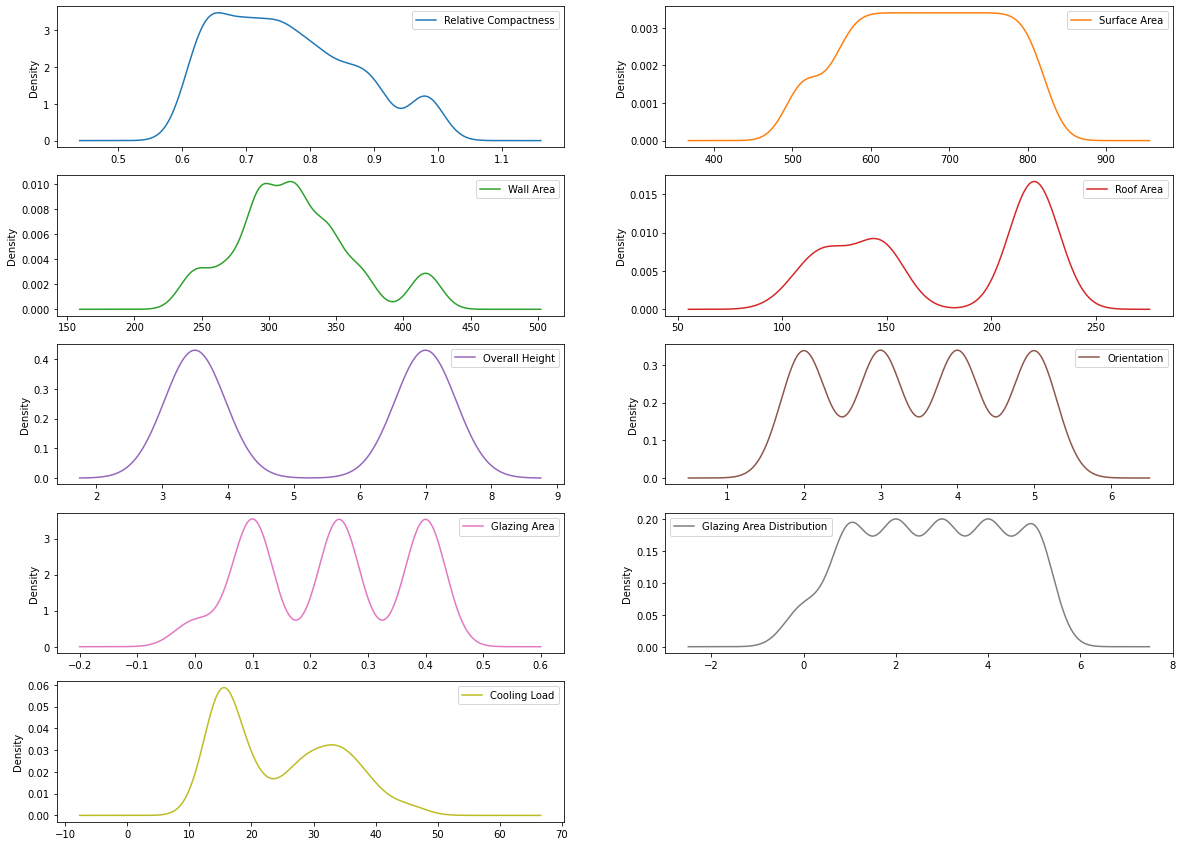

In [14]:
df.plot(kind='density', subplots=True, layout=(5,2), figsize=(20, 15), sharex=False)
plt.show()

In [15]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Cooling Load'],
      dtype='object')

In [57]:
# Extract columns
ar1 = ['Surface Area', 'Wall Area', 'Roof Area']

ar2 = ['Overall Height', 'Orientation', 
       'Glazing Area Distribution']

ar3 = ['Glazing Area', 'Relative Compactness']

cool = ['Cooling Load']

features = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution']


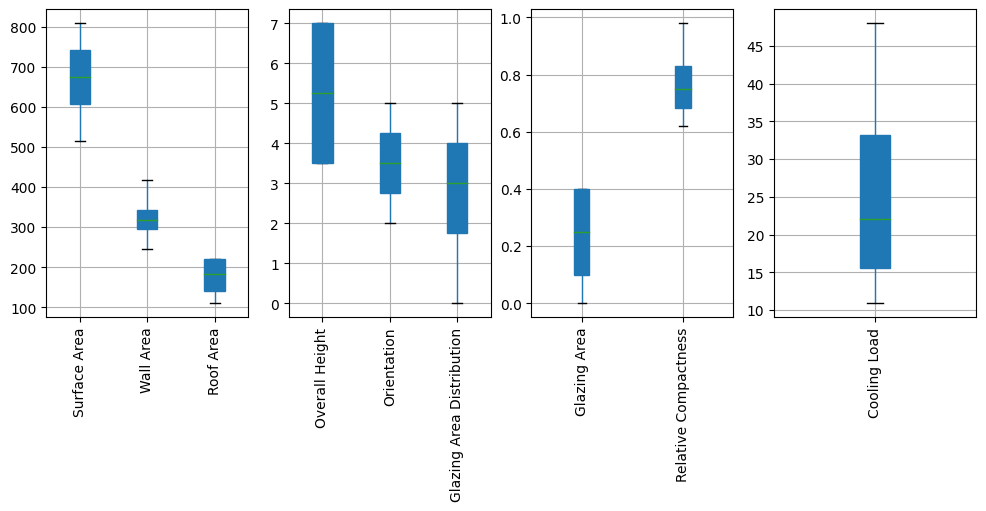

In [61]:
plt.style.use('default')

plt.figure(figsize=(12,4))

# Plot ar1
plt.subplot(1, 4, 1); df[ar1].boxplot(rot = 90, patch_artist = True)

# Plot ar2
plt.subplot(1, 4, 2); df[ar2].boxplot(rot = 90, patch_artist = True)

# Plot ar3
plt.subplot(1, 4, 3); df[ar3].boxplot(rot = 90, patch_artist = True)

# Plot cool
plt.subplot(1, 4, 4); df[cool].boxplot(rot = 90, patch_artist = True)
plt.show()

Features vary in magnitudes, units, and range.The attributes are not normally distributed and some columns have extremely large values while others have extremly low values. Hence there is a need for scaling and normalization.Feature Scaling basically helps to normalize the data within a particular range. 

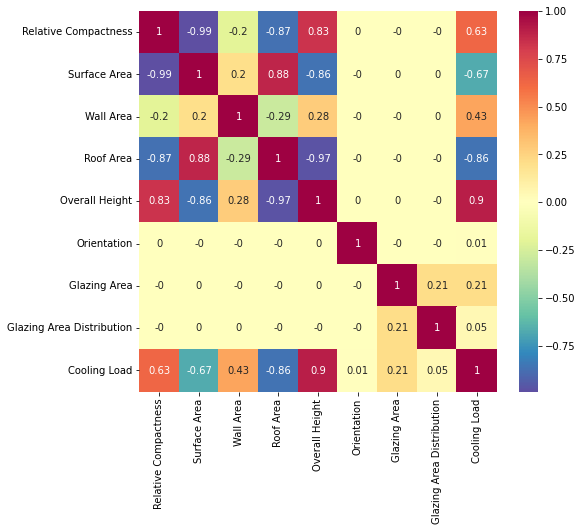

In [18]:
# Check the correlation between each column
cor = df.corr().round(2)
plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,cmap = 'Spectral_r')
plt.show()

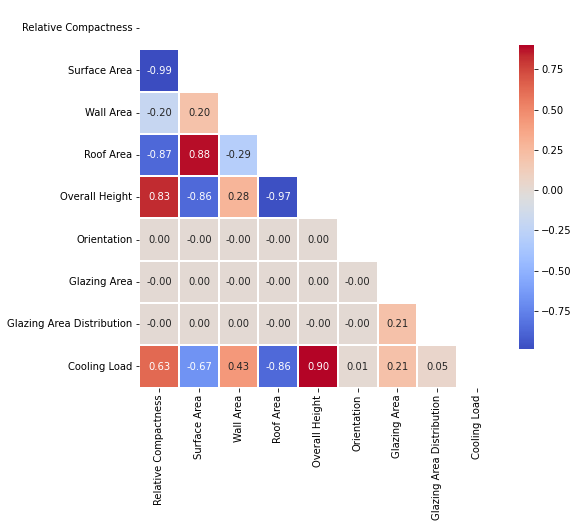

In [19]:
# creating a mask to keep only the half of the correlation table

mask = np.triu(np.ones_like(cor,dtype=bool))

plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,mask=mask,
            cmap = 'coolwarm',
            linewidths=1,fmt=".2f",
            cbar_kws={"shrink": .8})
plt.show()

From the heatmap there is a moderate to high associaton between features(X1,X2,X3,X4 and X5) response Y2. Features X6,X7 and X8 have close to no association with Y2. 

## Data preprocessing for modelling

Seperating the data into target variable and features

In [20]:
# Features(X) values, drop the Y1 and Y2 columns

X = df.drop(df[cool], axis = 1)

In [21]:
# Output the first 5 rows of X values

X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [22]:
# Create Target (Y2) values by dropping X columns and Y1 column

y = df.drop(df[features], axis = 1)

In [23]:
# Output the first 5 rows of y values

y.head()

,Cooling Load
0,21.33
1,21.33
2,21.33
3,21.33
4,28.28


Splitting the data into train_set and test_set

In [24]:
# Set Seed to use for all models
SEED = 23


In [25]:
#Split into 72% train and 28% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = SEED)

## Building of Models

In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms.

LinearRegression  as base model

In [37]:
# Instatiate LinearRegression
lr = LinearRegression()

# Fit model
lr.fit(X_train,y_train)

# Predict the test set labels
lr_y_pred = lr.predict(X_test)

# Evaluate the test set LinearRegression
rmse_test = MSE(y_test,lr_y_pred, squared = False)

# Print the test set LinearRegression
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,lr_y_pred)}')

Test set RMSE: 3.338493865513324

Test set r2_score: 0.8731699324937109


#### XG Boost Regressor

In [27]:
#Instatiate xgboost
xgb_r = XGBRegressor(n_estimators = 200, seed = SEED)
# fit model
xgb_r.fit(X_train, y_train)

# predict on the test set
xgb_r_y_pred_ = xgb_r.predict(X_test)

# Evaluate the test set RMSE and r2_score
rmse_test = MSE(y_test, xgb_r_y_pred_, squared = False)
r2_scores = r2_score(y_test, xgb_r_y_pred_)

# Print the test set RMSE
print(f"Test set RMSE: {round(rmse_test, 4)}")
print(f"Test set r2_score: {round(r2_scores, 4)}")


[21:04:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set RMSE: 1.2936
Test set r2_score: 0.981


Gradient Boosting Regressor

In [28]:
# Instantiate object
gbt = GradientBoostingRegressor(n_estimators=200, 
                                max_depth=1, 
                                random_state = SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
gbt_y_pred_ = gbt.predict(X_test)
y_pred_train = gbt.predict(X_train)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, gbt_y_pred_, squared = False)
r2_scores = r2_score(y_test,gbt_y_pred_)

# Print the test set RMSE
print(f"Test set RMSE: {round(rmse_test, 2)}")
print(f"Test set r2_score_pred: {r2_scores}")

Test set RMSE: 2.21
Test set r2_score_pred: 0.9443782958608093


#### Random Forest Regressor

In [29]:
# instantiate object
rfr = RandomForestRegressor(n_estimators = 200, random_state = SEED)

# fit rfr to the training set
rfr.fit(X_train,y_train)

# Predict the test set labels
rfr_y_pred_ = rfr.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,rfr_y_pred_, squared = False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,rfr_y_pred_)}')


Test set RMSE: 1.6646965698970018

Test set r2_score: 0.9684651167223528


### Feature Importance

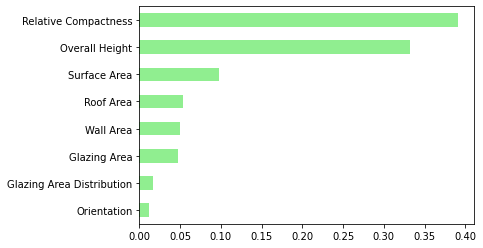

In [30]:
# create a pd.Series of feature importance
importance_rf = pd.Series(rfr.feature_importances_, index=X_train.columns)

# sort importance_rf
sorted_importance_rf = importance_rf.sort_values()

# make a horizontal plot
sorted_importance_rf.plot(kind = 'barh', color = 'lightgreen')
plt.show()


#### Lasso

In [38]:
# instantiate object
ls = Lasso(random_state = SEED)

# fit ls to the training set
ls.fit(X_train,y_train)

# Predict the test set labels
ls_y_pred = ls.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,ls_y_pred, squared = False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,ls_y_pred)}')

Test set RMSE: 4.561829482261549

Test set r2_score: 0.7631904820286444


#### Decision Tree Regressor

In [39]:
# instantiate object
dtr = DecisionTreeRegressor(random_state = SEED)

# fit dtr to the training set
dtr.fit(X_train,y_train)

# Predict the test set labels
dtr_y_pred = dtr.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,dtr_y_pred, squared=False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,dtr_y_pred)}')

Test set RMSE: 2.540026246583553

Test set r2_score: 0.9265828591987482


#### Ridge

In [40]:
# instantiate object
ridge = Ridge(random_state = SEED)

# fit ridge to the training set
ridge.fit(X_train,y_train)

# Predict the test set labels
ridge_y_pred = ridge.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,ridge_y_pred, squared=False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,ridge_y_pred)}')

Test set RMSE: 3.408983389210874

Test set r2_score: 0.8677575676577316


#### AdaBoost Regressor

In [41]:
# instantiate object
adb_r = AdaBoostRegressor( base_estimator = dtr, 
                          n_estimators = 200, 
                          learning_rate = 0.2,
                          random_state = SEED)

# fit adb_r to the training set
adb_r.fit(X_train,y_train)

# Predict the test set labels
adb_r_y_pred = adb_r.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,adb_r_y_pred, squared=False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,adb_r_y_pred)}')

Test set RMSE: 1.8025924092648877

Test set r2_score: 0.9630243230042723


#### Bagging Regressor

In [36]:
# instantiate object
br = BaggingRegressor(base_estimator = dtr, 
                      n_estimators = 200, 
                      n_jobs = -1, 
                      random_state = SEED)

# fit br to the training set
br.fit(X_train,y_train)

# Predict the test set labels
br_y_pred = br.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,br_y_pred,squared=False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,br_y_pred)}')

Test set RMSE: 1.668220254800948

Test set r2_score: 0.9683314748350884


## Parameter Tuning for best performing models

### GradientBoostingRegressor Pipeline 

In [ ]:
# Creating a pipe to scale the data for the GradientBoostingRegressor
pipe = Pipeline([("preprocessing", StandardScaler()), 
                 ("regressor", GradientBoostingRegressor())])

# Parameter tuning
param_grid = [{"regressor" : [GradientBoostingRegressor()],
               "preprocessing" : [StandardScaler()],
               "regressor__n_estimators" : [500, 600, 800, 1000, 2000, 2600, 3000],
               "regressor__learning_rate" : [00.01, 0.01, 0.05, 0.2, 0.3, 0.4, 0.5],
               "regressor__max_depth" : [1 ,2, 3, 4, 5, 6, 7]}]

# Instantiate GridSearch
grid = GridSearchCV(pipe, param_grid, cv = 10, scoring = "r2")

# Fit x and y
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             param_grid=[{'preprocessing': [StandardScaler()],
                          'regressor': [GradientBoostingRegressor(learning_rate=0.05,
                                                                  max_depth=4,
                                                                  n_estimators=2600)],
                          'regressor__learning_rate': [0.01, 0.01, 0.05, 0.2,
                                                       0.3, 0.4, 0.5],
                          'regressor__max_depth': [1, 2, 3, 4, 5, 6, 7],
                          'regressor__n_estimators': [500, 600, 800, 1000, 2000,
                                                      2600, 3000]}],
             scoring='r2')

In [ ]:
#Print Best model and Best score

print(f"Best model parameters: {grid.best_params_}")
print('')
print(f"Best score: {grid.best_score_}")

Best model parameters: {'preprocessing': StandardScaler(), 'regressor': GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=2600), 'regressor__learning_rate': 0.05, 'regressor__max_depth': 4, 'regressor__n_estimators': 2600}

Best score: 0.9908595233867246


### RondomForestRegressor Pipeline 

In [ ]:
# Creating a pipe to scale the data for the RandomForestRegressor
pipe = Pipeline([("preprocessing", StandardScaler()), 
                 ("regressor", RandomForestRegressor())])

# Parameter tuning
param_grid = [{"regressor" : [RandomForestRegressor()], 
               "preprocessing" : [StandardScaler()],
               "regressor__n_estimators" : [500, 600, 800, 1000, 2000, 2600, 3000],
               "regressor__min_samples_leaf" : [0.1, 0.2, 0.3, 1, 2, 3, 4]}]
        

# Instantiate GridSearch
grid = GridSearchCV(pipe, param_grid, cv = 10, scoring = "r2")

# Fit x and y
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid=[{'preprocessing': [StandardScaler()],
                          'regressor': [RandomForestRegressor(n_estimators=800)],
                          'regressor__min_samples_leaf': [0.1, 0.2, 0.3, 1, 2,
                                                          3, 4],
                          'regressor__n_estimators': [500, 600, 800, 1000, 2000,
                                                      2600, 3000]}],
             scoring='r2')

In [ ]:
#Print Best model and Best score
print(f"Best model parameters: {grid.best_params_}")
print('')
print(f"Best score: {grid.best_score_}")

Best model parameters: {'preprocessing': StandardScaler(), 'regressor': RandomForestRegressor(n_estimators=800), 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 800}

Best score: 0.9687872648246241


### XGBoostRegressor Pipeline 

In [ ]:
# Creating a pipe to scale the data for the XGBoostRegressor
pipe = Pipeline([("preprocessing", StandardScaler()), ("regressor", XGBRegressor())])

# Parameter tuning
param_grid = [{"regressor" : [XGBRegressor()], "preprocessing" : [StandardScaler()],
               "regressor__n_estimators" : [500, 600, 800, 1000, 2000, 2600, 3000]
}]

# Instantiate GridSearch
grid = GridSearchCV(pipe, param_grid, cv = 10, scoring = "r2")

# Fit x and y
grid.fit(X_train, y_train)

[16:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('regressor', XGBRegressor())]),
             param_grid=[{'preprocessing': [StandardScaler()],
                          'regressor': [XGBRegressor(n_estimators=3000)],
                          'regressor__n_estimators': [500, 600, 800, 1000, 2000,
                                                      2600, 3000]}],
             scoring='r2')

In [ ]:
#Print Best model and Best score
print(f"Best model parameters: {grid.best_params_}")
print('')
print(f"Best score: {grid.best_score_}")

Best model parameters: {'preprocessing': StandardScaler(), 'regressor': XGBRegressor(n_estimators=3000), 'regressor__n_estimators': 3000}

Best score: 0.9871001276053303


## Model Selection

In [42]:
# Create a fiunction to visualise the test and predict sets

def model_perf_visual(test, predict, model):
  """Take test set, predict variables and model to visualised the erro 
  margine between the test and pridect """
  
  actual = test.reset_index(drop = True)
  value = pd.Series(predict)
  plt.figure(figsize = (14,7))
  plt.plot(actual, color = 'blue', label = 'Actual values')
  plt.plot(value, color = 'red', label = 'Predicted values')
  plt.legend()
  plt.xlabel("Index")
  plt.ylabel("Values")
  plt.title(f"{model} Performance")
  plt.show()

#### Gradient Boosting Regressor  model

In [45]:
# Instantiate object
gbt = GradientBoostingRegressor(learning_rate=0.05, 
                                max_depth=4, 
                                n_estimators=3000, 
                                random_state = SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
gbt_y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, gbt_y_pred, squared = False)
r2_scores = r2_score(y_test,gbt_y_pred)


# Print the test set RMSE
print(f"Test set RMSE: {round(rmse_test, 2)}")
print(f"Test set r2_score_pred: {r2_scores}")

Test set RMSE: 0.8
Test set r2_score_pred: 0.9926799897868005


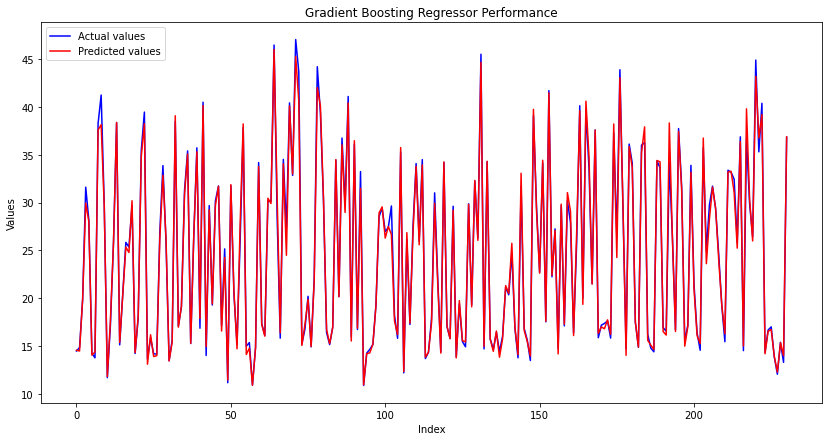

In [46]:
 # Call model_perf_visual function for Gradient Boosting Regressor model

 model_perf_visual(y_test, gbt_y_pred, "Gradient Boosting Regressor")

#### Random Forest Regressor model

In [47]:
# instantiate object
rfr = RandomForestRegressor(n_estimators = 300, random_state = SEED)

# fit rfr to the training set
rfr.fit(X_train,y_train)

# Predict the test set labels
rfr_y_pred = rfr.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,rfr_y_pred, squared = False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,rfr_y_pred)}')

Test set RMSE: 1.668875110972099

Test set r2_score: 0.9683066071361518


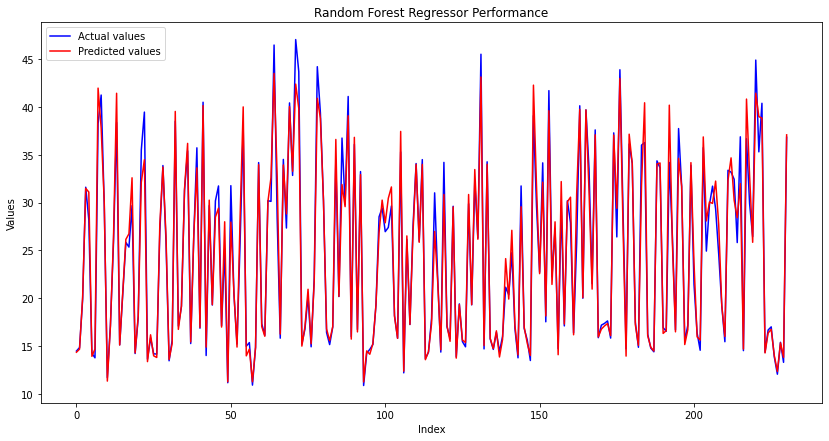

In [48]:
 # Call model_perf_visual function for Random Forest Regressor model

 model_perf_visual(y_test, rfr_y_pred, "Random Forest Regressor")

#### XG Boost Regressor model

In [49]:
#Instatiate xgboost
xgb_r = XGBRegressor(n_estimators = 2000, seed = SEED)
# fit model
xgb_r.fit(X_train, y_train)

# predict on the test set
xgb_r_y_pred = xgb_r.predict(X_test)

# Evaluate the test set RMSE and r2_score
rmse_test = MSE(y_test, xgb_r_y_pred, squared = False)
r2_scores = r2_score(y_test, xgb_r_y_pred)

# Print the test set RMSE
print(f"Test set RMSE: {round(rmse_test, 4)}")
print(f"Test set r2_score: {round(r2_scores, 4)}")

[21:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set RMSE: 1.1127
Test set r2_score: 0.9859


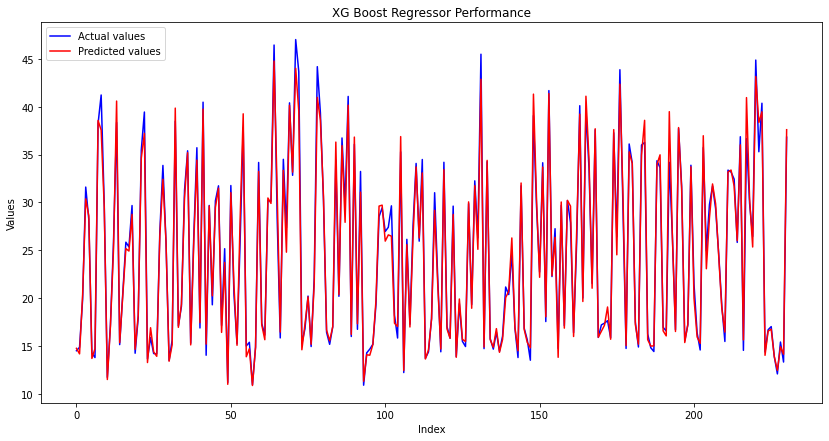

In [50]:
 # Call model_perf_visual function for XG Boost Regressor model

 model_perf_visual(y_test, xgb_r_y_pred, "XG Boost Regressor")

#### Bagging Regressorr model

In [51]:
# instantiate object
bar = BaggingRegressor(base_estimator = dtr, 
                       n_estimators = 200, 
                       n_jobs = -1, 
                       oob_score = True, 
                       random_state = SEED)

# fit bar to the training set
bar.fit(X_train,y_train)

# Predict the test set labels
bar_y_pred = bar.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,bar_y_pred, squared=False)

# Print the test set RMSE
print(f'Test set RMSE: {rmse_test}')
print('')
print(f'Test set r2_score: {r2_score(y_test,bar_y_pred)}')

Test set RMSE: 1.668220254800948

Test set r2_score: 0.9683314748350884


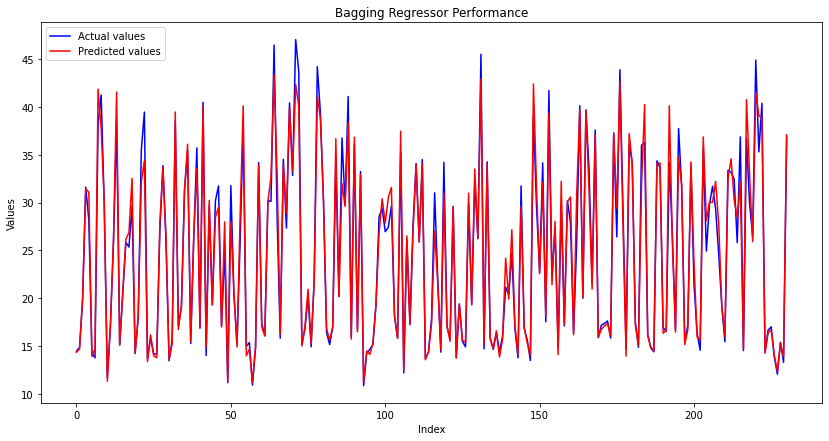

In [53]:
# Call model_perf_visual function for Bagging Regressorr model

model_perf_visual(y_test, bar_y_pred, "Bagging Regressor")

#### AdaBoost Regressor model

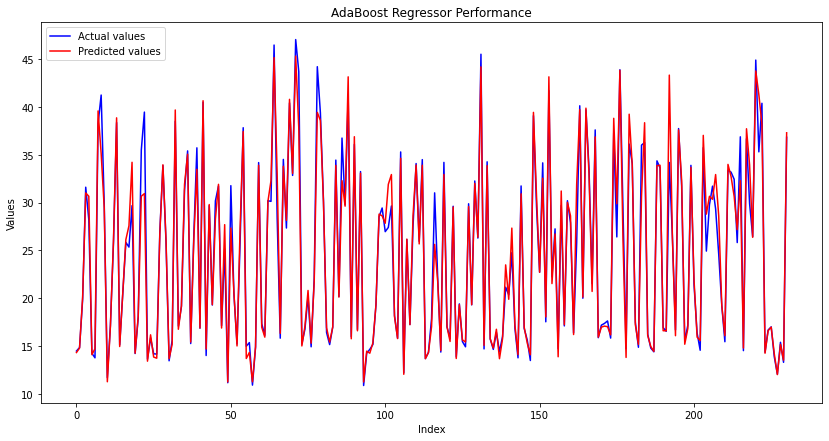

In [55]:
# Call model_perf_visual function for AdaBoost Regressor model

model_perf_visual(y_test, adb_r_y_pred, "AdaBoost Regressor")

## Conclusion

The **GradientBoostingRegressor** was selected as the best model for predicting the cooling load of buildings based on given parameters. This model was selected because it gave the highest **r2_score of 0.99.**